In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.parser import parse
from collections import Counter
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

Pre-Processing

In [12]:
data = pd.read_csv('books_1.Best_Books_Ever.csv') #read the data
df = pd.DataFrame(data) #create the dataframe

df.dropna(inplace=True) #drop the null values from the original dataframe

df['ratingsByStars'] = df['ratingsByStars'].str.strip('[]') #remvove [] brackets
df['ratingsByStars'] = df['ratingsByStars'].str.replace("'",'') #remove the ' from each word
df[['ratingStar5','ratingStar4','ratingStar3','ratingStar2','ratingStar1']] = df['ratingsByStars'].str.split(',',expand=True) #split the string by each comma and add the new
#string to each of the new columns created

df['genres'] = df['genres'].str.strip('[]') #remove [] brackets
df['genreSingle'] = df['genres'].str.split(',').str[0].str.strip() #extract only the first string from the stri split method

df['Year'] = pd.to_datetime(df['publishDate'], errors='coerce') #conver the column to datetime object and if we encounter error set the value
                                                                #to null
df.dropna(inplace=True) #2 records had invalid publish date so we remove them from the dataframe
df['Year'] = df['Year'].dt.year #extract the year from the dates

Question 1

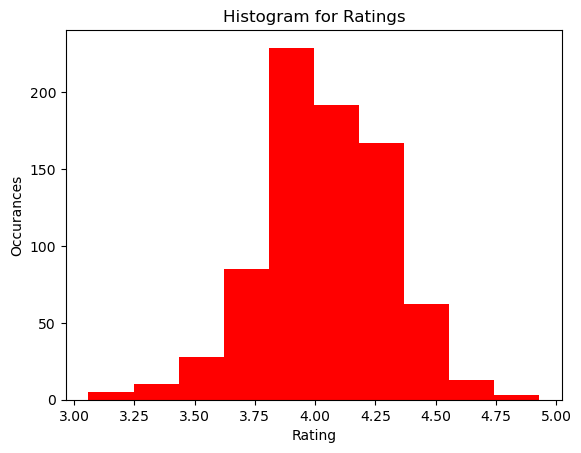

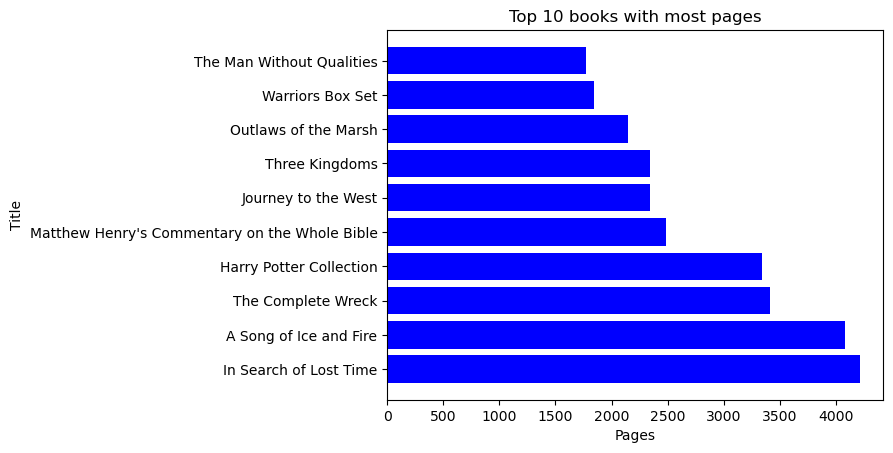

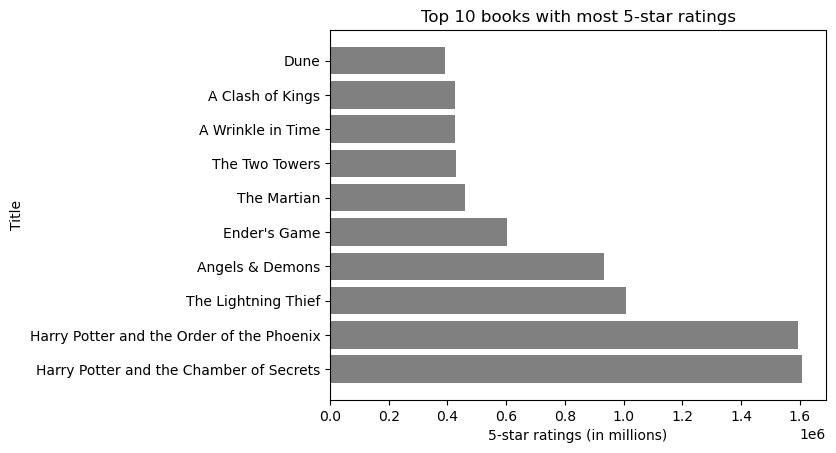

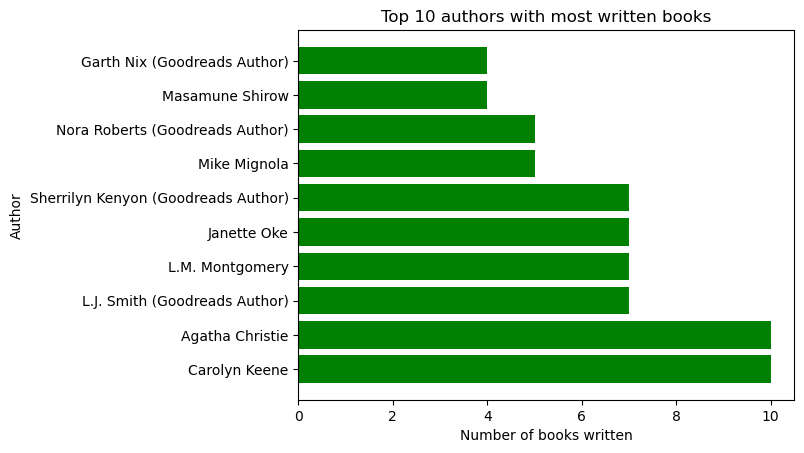

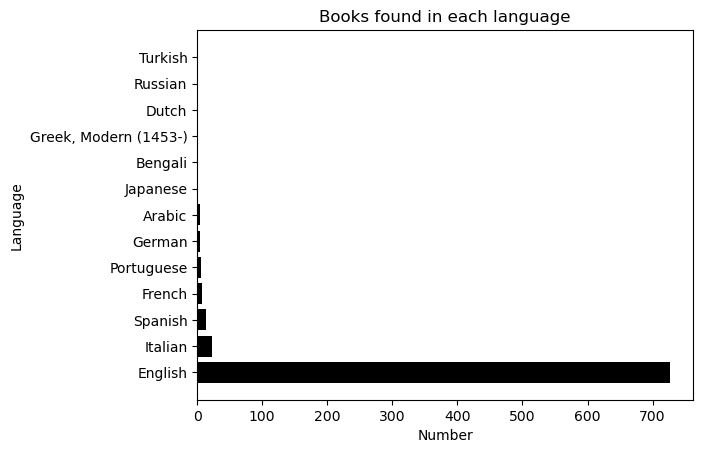

In [13]:
#1st graph (1.1 Question)
plt.hist(df['rating'],color='red')  #show the rating column of dataframe in a histogram
plt.title('Histogram for Ratings')
plt.xlabel('Rating')
plt.ylabel('Occurances')
plt.show()

#2nd graph (1.2 Question)
# cast the 'value' column to integers
df['pages'] = df['pages'].astype(int)   #cast to short the dataframe treating pages as integers and not strings
dfSortedByPages = df.sort_values('pages', ascending=False,) #sort by descending order the dataframe by the pages column
df_top10 = dfSortedByPages.head(10)   #get only the top 10 cases
plt.barh(df_top10['title'], df_top10['pages'], color='blue') #create the bar-chart,on x-axis the number of pages and in y axis the title of the book

plt.xlabel('Pages') #add labels & title
plt.ylabel('Title')
plt.title('Top 10 books with most pages')
plt.show()

#3rd graph (1.3 Question)
df['ratingStar5'] = df['ratingStar5'].astype(int)   #cast to short the dataframe treating pages as integers and not strings
dfNew = df[df['ratingStar5'] > 1000]  #get only the entries with 10.000 and above 5-star ratings first
dfSortedByPages = dfNew.sort_values('ratingStar5', ascending=False,) #sort by descending order the dataframe by the pages column
df_top10 = dfSortedByPages.head(10)   #get only the top 10 cases
plt.barh(df_top10['title'], df_top10['ratingStar5'], color='grey') #create the bar-chart,on x-axis the number of 5-star ratings and in y axis the title of the book

plt.xlabel('5-star ratings (in millions)') #add labels & title
plt.ylabel('Title')
plt.title('Top 10 books with most 5-star ratings')
plt.show()

#4rd graph (1.5 Question)
dfNew = df['author'].value_counts()  #distinct each author of the dataframe how many books has written
dfNew = dfNew.head(10)   #get only the 10 top frequent authors of the dataframe
plt.barh(dfNew.index,dfNew.values, color='green')

plt.xlabel('Number of books written') #add labels & title
plt.ylabel('Author')
plt.title('Top 10 authors with most written books')
plt.show()

#5rd graph (1.8 Question)
dfNew = df['language'].value_counts()  #distinct each language of the dataframe how many books are written in each
plt.barh(dfNew.index,dfNew.values, color='black')

plt.xlabel('Number') #add labels & title
plt.ylabel('Language')
plt.title('Books found in each language')
plt.show()

Question 2

In [14]:
#BookId,Description,“English” as language

Question 4

In [26]:
common_words = Counter(df['genreSingle']) #count how many books correspond to each genre

most_common = common_words.most_common(10) #keep the 10 most common

most_common_genres = [] #the most common method returns a tuple containing the genre name and
for word,count in most_common: #the number of the occurences for each genre in the dataframe
    most_common_genres.append(word) #so we split the tuple and keep only the genre name

new_df = df.copy() #create a copy of the dataframe
new_df = new_df[new_df['genreSingle'].apply(lambda x: any(word in x for word in most_common_genres))]
#apply a lamdba function to keep only the books that are in the 10 most common genres

columns_keep = ['genreSingle','description','bookId'] #we want to keep only these 3 columns
new_df = new_df.drop(columns=[col for col in new_df.columns if col not in columns_keep]) #delete the columns which are not in the list above



Index(['bookId', 'description', 'genreSingle'], dtype='object')
